In [123]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns

# matplotlib used for data vis in Python (plots)
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure


# normally, the default behaviour is to display Matplotlib plots in a separate window or as a pop-up
# but here...
%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8)
# inline command = displays the plots inline, directly below the code cell that generated the plot


# Read in the data

df = pd.read_csv('/Users/andreadilorenzo/Documents/Project-Portfolio/movies/movies.csv')

In [124]:

# Let's look at the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [127]:
# check for missing data

for col in df.columns:
    null_count = df[col].isnull().sum()  
    total_count = df[col].size
    pct_missing = null_count / total_count
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [126]:
# drop rows with missing data (out of place)

df = df.dropna(axis=0)

In [128]:
# check data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [129]:
# refine data types for our columns

df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  
0   46998772        Warner Bros.    146.0  
1   58853106   Columbia Pictures    104.0  
2  538375067           Lucasfilm    124.0  
3   83453539  Paramount Pictures     88.0  
4   39846344      Orion Pictures     98.0

In [130]:
# create correct_year col

df['correct_year'] = df['released'].str.extract(pat='([0-9]{4})').astype('int64')

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  correct_year  
0   46998772        Warner Bros.    146.0          1980  
1   58853106   Columbia Pictures    104.0          1980  
2  538375067           Lucasfilm    124.0          1980  
3   83453539  Paramount Pictures     88.0          1980  
4   39846344      Orion Pictures     98.0          1980

In [131]:
# Order the dataframe by gross revenue

df.sort_values(by=['gross'], inplace=False, ascending=False)



name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
6311                                    Despicable Me 2         PG  Animation   
6

In [132]:
# check for duplicates (and drop)

df = df.drop_duplicates().sort_values(by=['gross'], inplace=False, ascending=False)

In [133]:

# Hypothesis 1: Budget highly correlated to gross revenue

# Hypothesis 2: Company establishment / reputation = highly correlated with gross revenue

Text(0, 0.5, 'Gross Earnings')

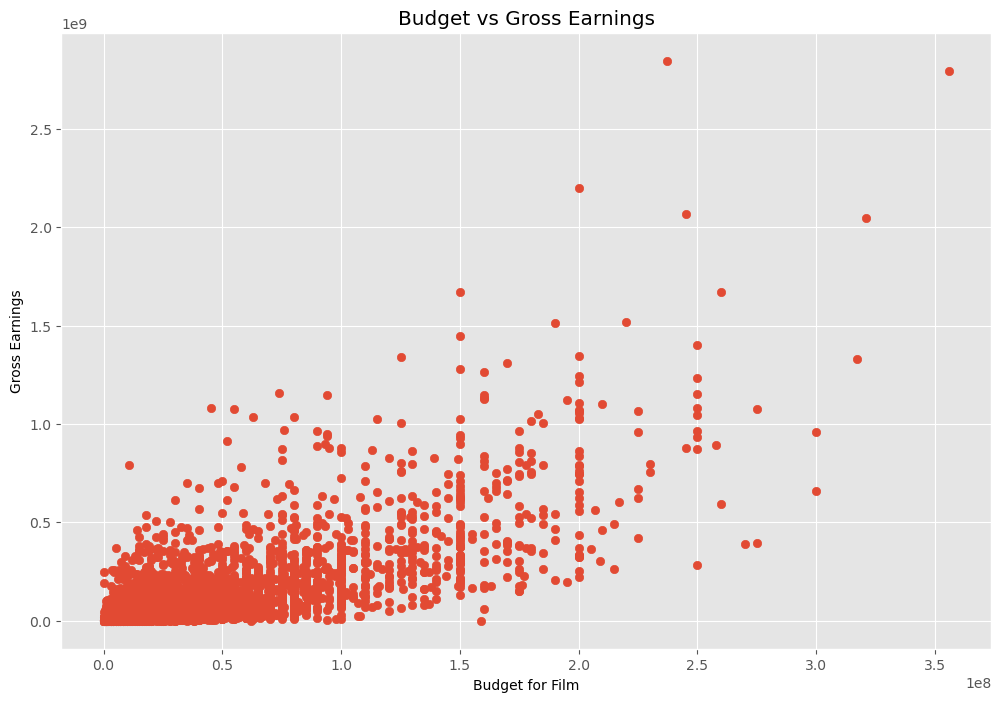

In [134]:

# Starting with Hypothesis 1

# Scatter plot of budget vs gross revenue

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')

In [135]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score    votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime  correct_year  
5445  2847246203  Twentieth Century Fox    162.0          2009  
7445  2797501328         Marvel Studios    181.0          2019  
3045  2201647264  Twentieth Century Fox    194.0          1997  
6663  2069521700              Lucasfilm    138.0          2015  
7244  2048359754         Marvel Studios    149.0          2018

<Axes: xlabel='budget', ylabel='gross'>

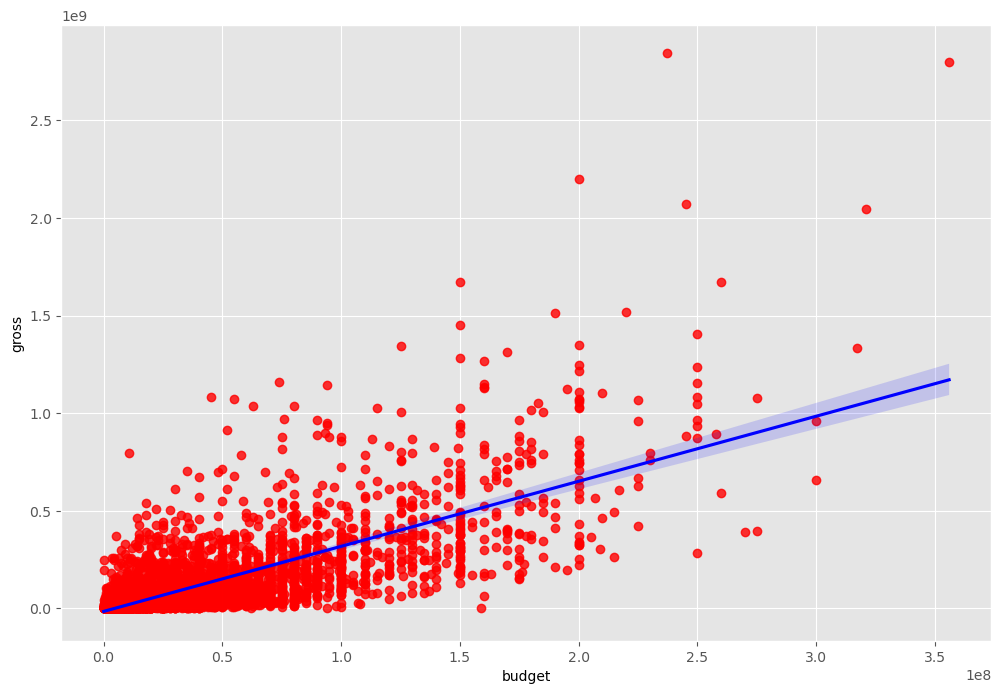

In [136]:

# Hard to tell what the correlation is exactly, so going to create a regression plot (via seaborn)

# Plot Budget vs Gross Revenue using Seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"}) # different syntax than graphing with plt.scatter

In [103]:

# Can see there is a positive correlation, but not sure how much

# Let's look at correlation 

# What are the numeric fields we can assess correlation for?

df.corr(numeric_only=True) 

# Let's look at correlation of gross revenue with score, votes, and budget specifically

df.corr(method='pearson', numeric_only=True).loc[['gross'],['score', 'votes', 'budget']]


# note that different correlation methods yield different calculations - pearson, kendall, spearman

# important to know which method to use and WHY



score     votes    budget
gross  0.222556  0.614751  0.740247

Text(120.72222222222221, 0.5, 'Movie Features')

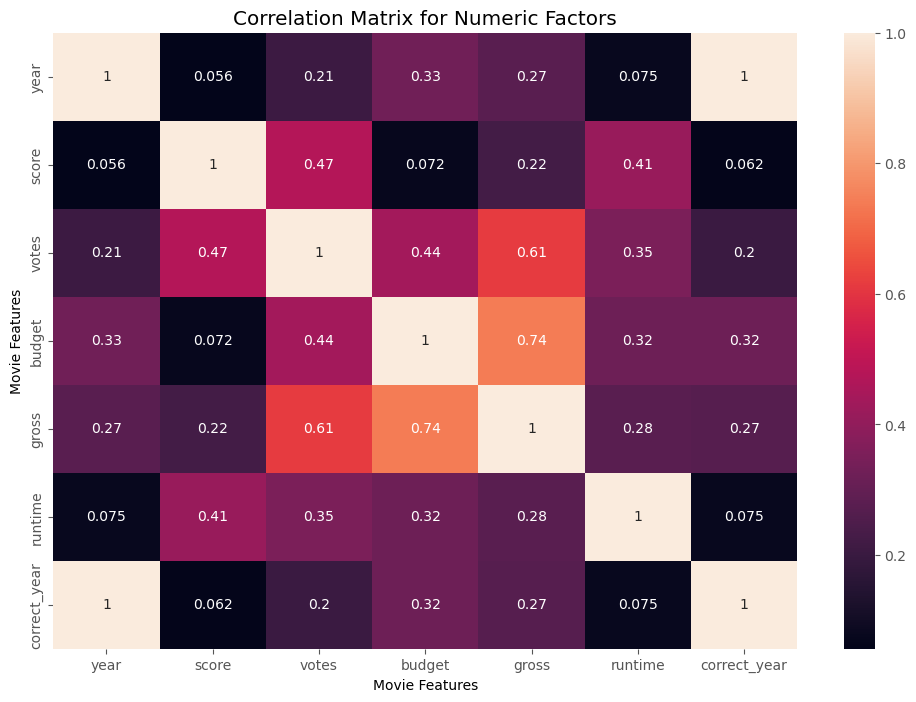

In [137]:

# Visualize correlations better

corr_matrix = df.corr(method='pearson', numeric_only=True)

sns.heatmap(corr_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Factors')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

# easier to see when colour-coded - easier than reading through EVERY number


In [138]:

# Next, Hypothesis 2:

# Numerize the object data (so we can assess correlation)

df_numerized = df

for col in df_numerized.columns:
    if (df_numerized[col].dtype == 'object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
        
df_numerized.head()

name  rating  genre  year  released  score    votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000       785    1263   
7445   388       5      0  2019       137    8.4   903000       105     513   
3045  4909       5      6  1997       534    7.8  1100000       785    1263   
6663  3643       5      0  2015       529    7.8   876000       768    1806   
7244   389       5      0  2018       145    8.4   897000       105     513   

      star  country     budget       gross  company  runtime  correct_year  
5445  1534       47  237000000  2847246203     1382    162.0          2009  
7445  1470       47  356000000  2797501328      983    181.0          2019  
3045  1073       47  200000000  2201647264     1382    194.0          1997  
6663   356       47  245000000  2069521700      945    138.0          2015  
7244  1470       47  321000000  2048359754      983    149.0          2018

Text(0, 0.5, 'Gross Earnings')

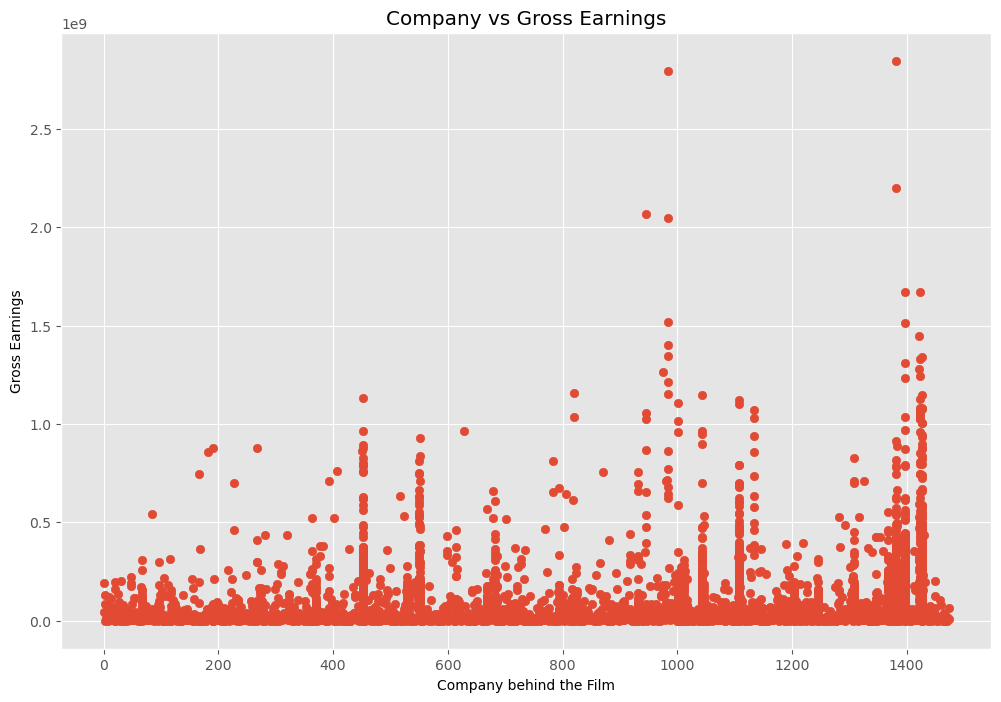

In [118]:

# Scatter Plot of Company vs Gross Earnings

plt.scatter(x=df_numerized['company'], y=df['gross'])

plt.title('Company vs Gross Earnings')
plt.xlabel('Company behind the Film')
plt.ylabel('Gross Earnings')

<Axes: xlabel='company', ylabel='gross'>

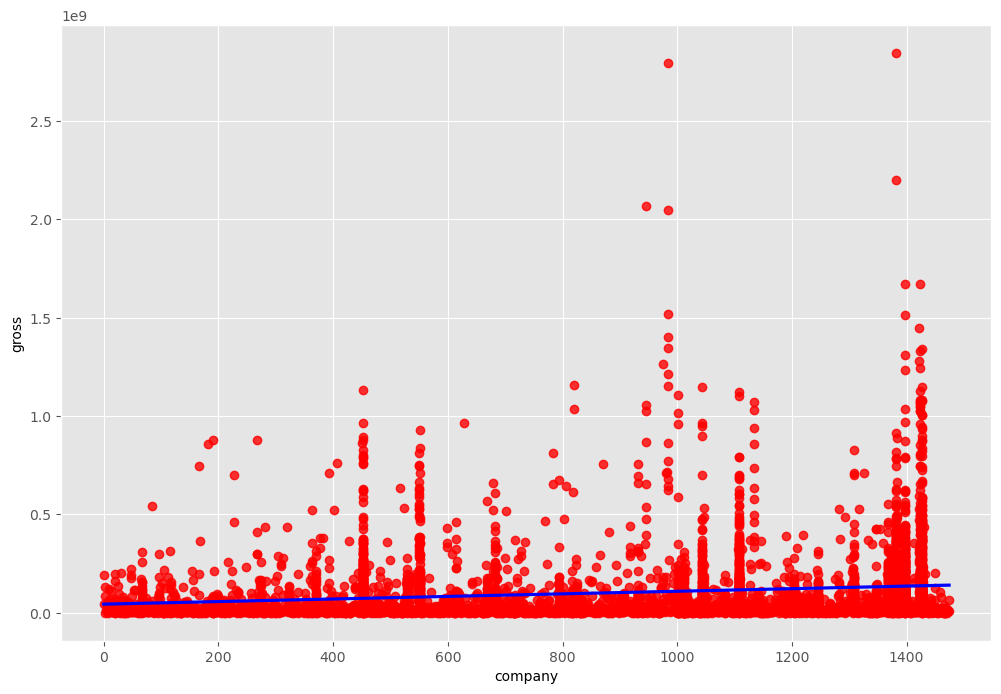

In [139]:
# Regression Plot of Company vs Gross Revenue

sns.regplot(x='company', y='gross', data=df_numerized, scatter_kws={"color": "red"}, line_kws={"color": "blue"}) 

Text(120.72222222222221, 0.5, 'Movie Features')

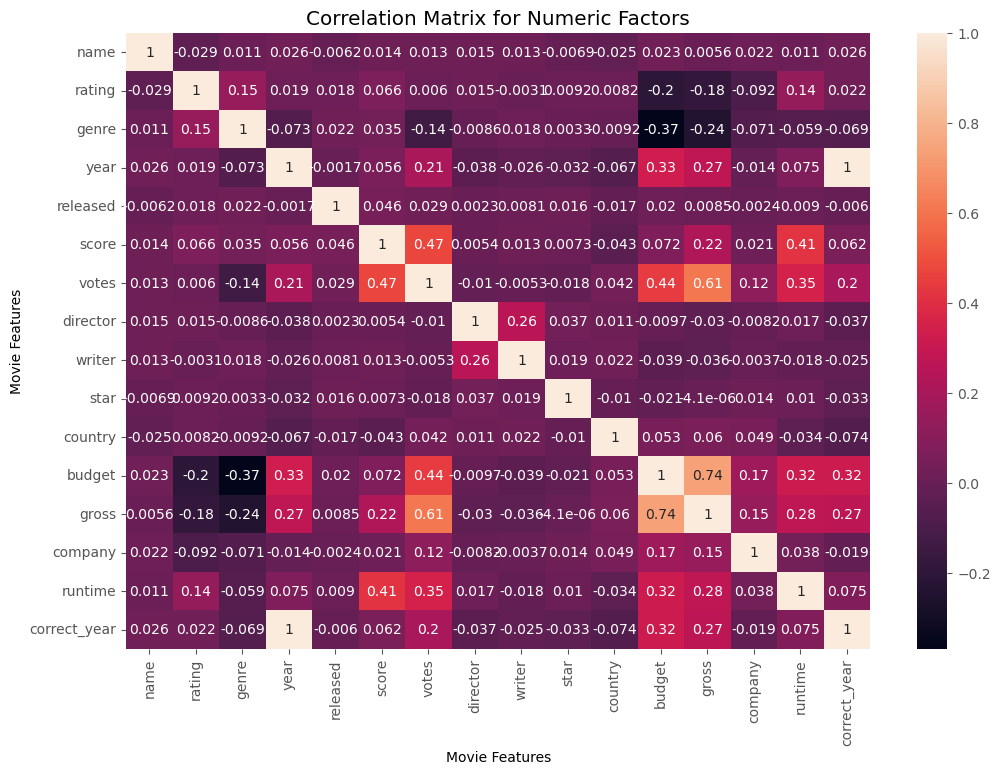

In [140]:

# Re-run the correlation matrix and heatmap

corr_matrix = df_numerized.corr(method='pearson', numeric_only=True)

sns.heatmap(corr_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Factors')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

# now we can see which factors are the MOST highly correlated

# seems that company and gross earnings are weakly correlated

# the factors that are most correlated with gross earnings are (1) budget (as we hypothesized) (r = 0.74) and (2) votes! (r = 0.61) 





In [141]:

# View in correlation pairs, if easier 

corr_pairs = df_numerized.corr().unstack()

corr_pairs

name          name            1.000000
              rating         -0.029234
              genre           0.010996
              year            0.025542
              released       -0.006152
              score           0.014450
              votes           0.012615
              director        0.015246
              writer          0.012880
              star           -0.006882
              country        -0.025490
              budget          0.023392
              gross           0.005639
              company         0.021697
              runtime         0.010850
              correct_year    0.025542
rating        name           -0.029234
              rating          1.000000
              genre           0.147796
              year            0.019499
              released        0.018083
              score           0.065983
              votes           0.006031
              director        0.014656
              writer         -0.003149
              star       

In [142]:

# Can SORT the correlation pairs for viewing, if easier 

sorted_pairs = corr_pairs.sort_values(ascending=False)

high_correlated_pairs = sorted_pairs[sorted_pairs > 0.5]

high_correlated_pairs = high_correlated_pairs[high_correlated_pairs < 1.0]

high_correlated_pairs

correct_year  year            0.998726
year          correct_year    0.998726
budget        gross           0.740247
gross         budget          0.740247
              votes           0.614751
votes         gross           0.614751
dtype: float64

In [ ]:

# clearly, the factors most correlated to gross earnings are (1) budget and (2) votes